<b>HR Analytics Project</b>

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

<b>HR Analytics</b>

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

<b>Attrition in HR</b>

Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question we will write the code and try to understand the process step by step.

<b>Attrition affecting Companies</b>

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

Dataset: https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

<b>Importing Necessary Libraries</b>

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [189]:
# Loading the data
hr=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [190]:
hr.shape

(1470, 35)

<b>Observation:</b>
There are 1470 rows and 35 columns in the dataset.

In [191]:
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [192]:
# Removing unnecessary columns in the dataset
import warnings
warnings.filterwarnings("ignore")
hr.drop(["EmployeeNumber","Over18","EmployeeCount","StandardHours"],axis=1,inplace=True)

In [193]:
hr.shape

(1470, 31)

In [194]:
numerical_data= hr.select_dtypes(include=["int64"])
numerical_data.shape

(1470, 23)

There are 23 attributes which are of int datatype.

In [195]:
categorical_data= hr.select_dtypes(include=["O"])
categorical_data.shape

(1470, 8)

There are 8 attributes which are of object datatype.

<b>Checking Missing Values</b>

In [196]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

<b>Observation:</b>
There are no missing values in the dataset.

# Exploratory Data Analysis

<b>Univariate Analysis</b>

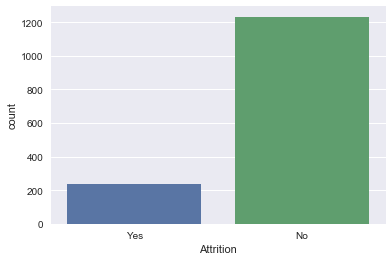

In [41]:
sns.countplot(hr["Attrition"])

From the above visualization, we can see that target variable is imbalanced.

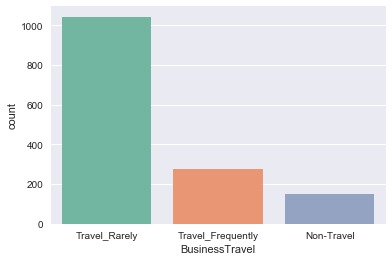

In [92]:
sns.countplot(hr["BusinessTravel"],palette="Set2")

<b>Observation:</b>
Most of the Employees Travel Rarely.

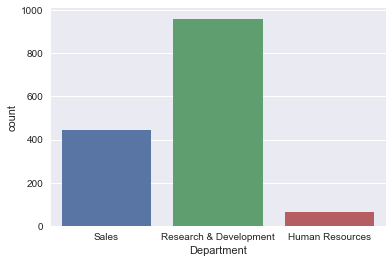

In [53]:
sns.countplot(hr["Department"])

There are three departments i.e. Sales, Research & Development, Human Resources. Out of which there are more employees who is in Research & Development.

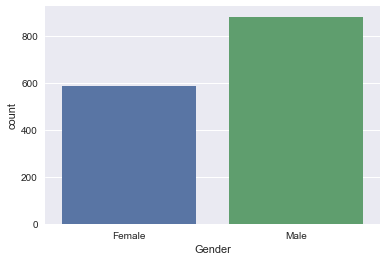

In [56]:
sns.countplot(hr["Gender"])

There are more number of employees who are Male.

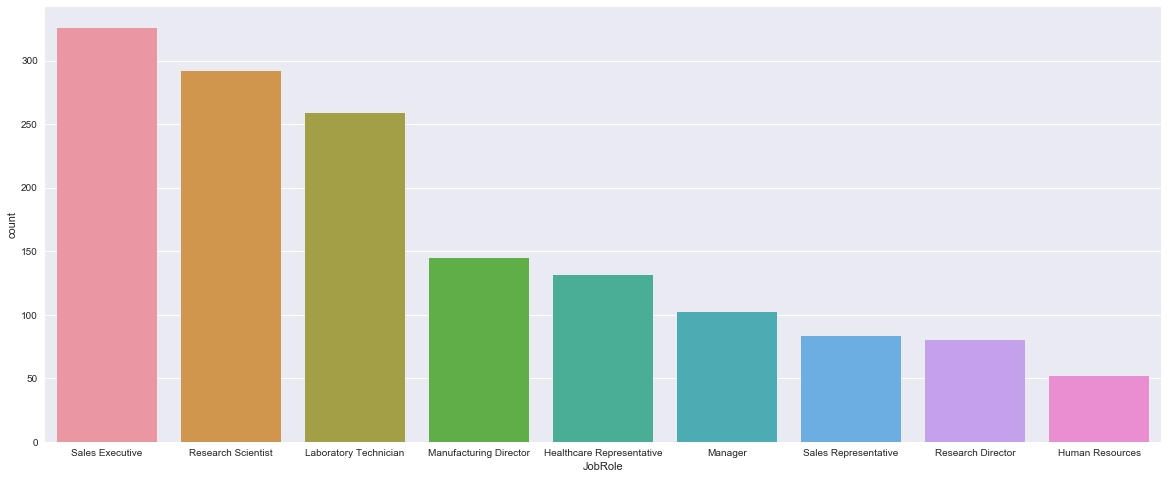

In [63]:
plt.figure(figsize=(20,8))
sns.countplot(hr["JobRole"])

<b>Observation:</b>
There are more employee who works as a Sales Executive.

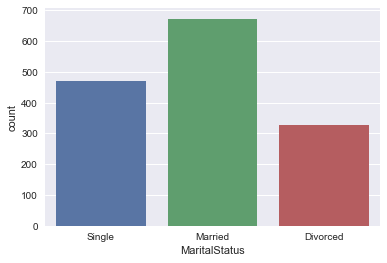

In [73]:
sns.countplot(hr["MaritalStatus"])

<b>Observation:</b>
Most of the employees who are working are Married.

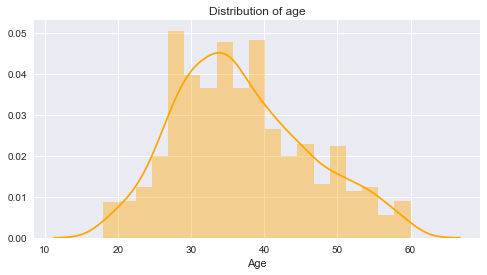

In [45]:
plt.figure(figsize=(8,4))
plt.title("Distribution of age")
a = sns.distplot(hr["Age"], color = 'orange')

<b>Observation:</b>
The average Age of employees is 35.

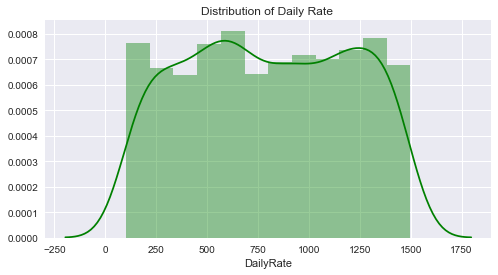

In [64]:
plt.figure(figsize=(8,4))
plt.title("Distribution of Daily Rate ")
b= sns.distplot(hr["DailyRate"], color = 'green')

<b>Observation:</b>
The average DailyRate is ~750.

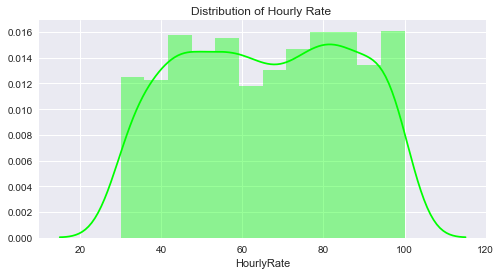

In [69]:
plt.figure(figsize=(8,4))
plt.title("Distribution of Hourly Rate ")
c= sns.distplot(hr["HourlyRate"], color = 'lime')

<b>Observation:</b>
The Hourly Rate of employees are ~ 70.

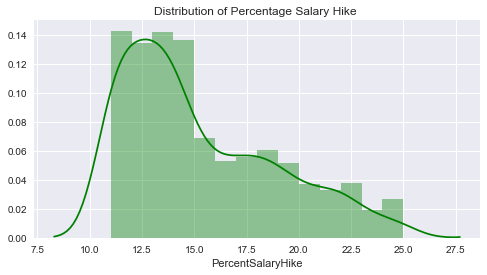

In [79]:
plt.figure(figsize=(8,4))
plt.title("Distribution of Percentage Salary Hike ")
d= sns.distplot(hr["PercentSalaryHike"], color = 'green')

<b>Observation:</b>
The average percentage salary hike of employees are 12.5

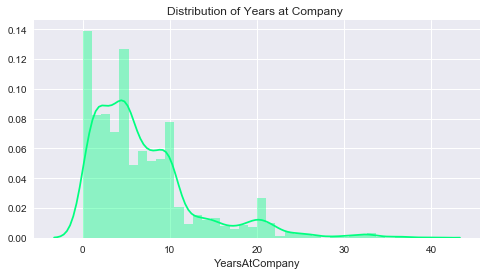

In [83]:
plt.figure(figsize=(8,4))
plt.title("Distribution of Years at Company ")
e= sns.distplot(hr["YearsAtCompany"], color = 'springgreen')

<b>Observation:</b>
The average years of employees at company is 5 years.

<b>Bi-Variate Analysis</b>

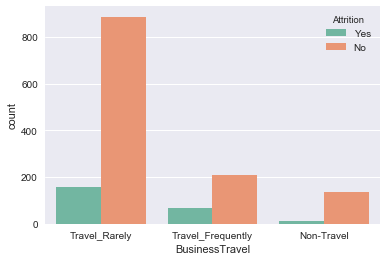

In [96]:
sns.countplot(x="BusinessTravel", hue="Attrition",data=hr,palette="Set2")
plt.show()

<b>Observation:</b>
From the above Visualization, it is clear that employees who travel rarely have high attrition.

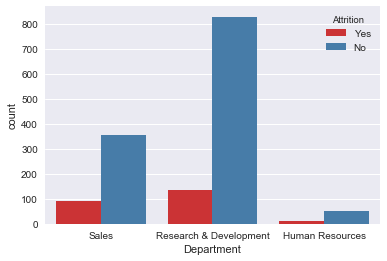

In [100]:
sns.countplot(x="Department", hue="Attrition",data=hr,palette="Set1")
plt.show()

<b>Observation:</b>
From the above visualization, it is clear that employees who are in Research & Development have high attrition.

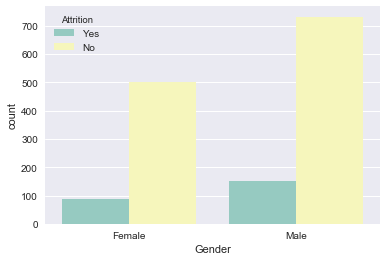

In [104]:
sns.countplot(x="Gender", hue="Attrition",data=hr,palette="Set3")
plt.show()

<b>Observation:</b>
From the above visualization, Males have high attrition.

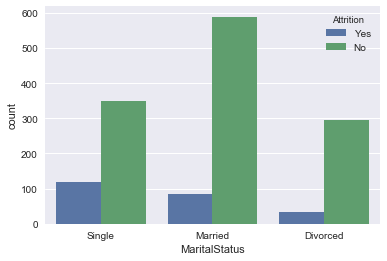

In [108]:
sns.countplot(x="MaritalStatus", hue="Attrition",data=hr)
plt.show()

<b>Observation:</b>
Employees who are single have high attrition.

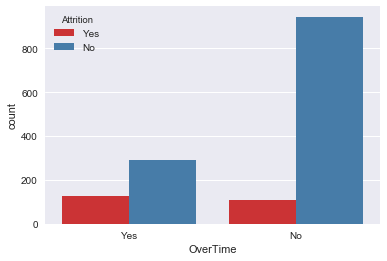

In [109]:
sns.countplot(x="OverTime", hue="Attrition",data=hr,palette="Set1")
plt.show()

<b>Observation:</b>
Employees who do over time have high attrition.

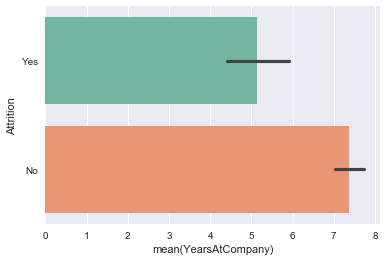

In [117]:
sns.barplot(x="YearsAtCompany", y="Attrition",data=hr,palette="Set2")
plt.show()

<b>Observation:</b>
Employees who are at the company and have experience <=5 have high attrition.

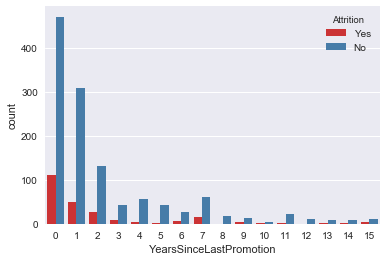

In [119]:
sns.countplot(x="YearsSinceLastPromotion", hue="Attrition",data=hr,palette="Set1")
plt.show()

<b>Observation:</b>
Employees who have less experience since last promotion have high attrition.

<b> Multi-Variate Analysis</b>

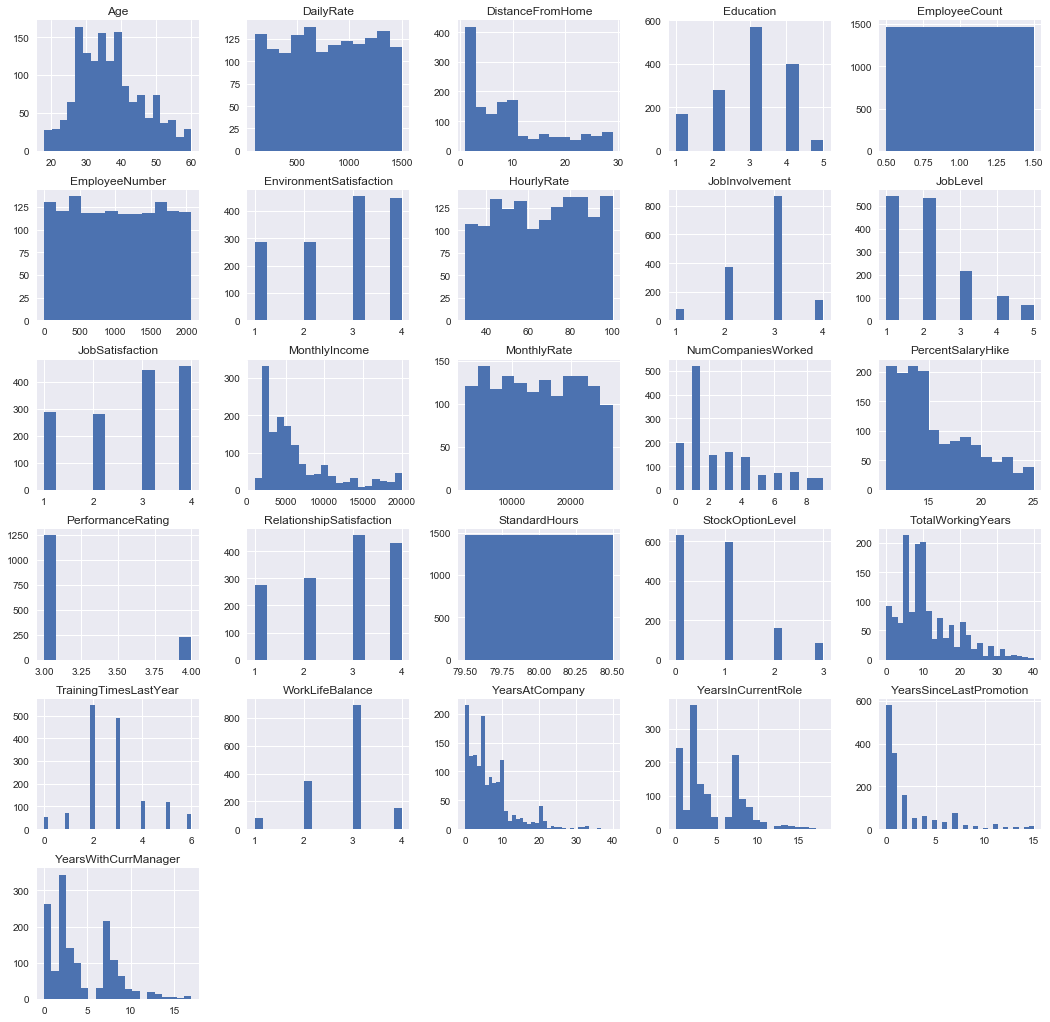

In [175]:
hr_data.hist(figsize=(18,18),grid=True,bins='auto');

In [176]:
hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<b>Checking Skewness</b>

In [197]:
hr.skew(axis=0)

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [198]:
# Treating the skewness in the dataset
for index in hr.skew().index:
    if hr.skew().loc[index]>0.5:
        hr[index]=np.log1p(hr[index])

In [199]:
hr.skew(axis=0)

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear      -1.075852
WorkLifeBalance            -0.552480
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64

<b>Label Encoder</b>

In [201]:
# Lets convert the target variable
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
hr["Attrition"]=LE.fit_transform(hr["Attrition"])
hr["BusinessTravel"]=LE.fit_transform(hr["BusinessTravel"])
hr["Department"]=LE.fit_transform(hr["Department"])
hr["EducationField"]=LE.fit_transform(hr["EducationField"])
hr["Gender"]=LE.fit_transform(hr["Gender"])
hr["JobRole"]=LE.fit_transform(hr["JobRole"])
hr["MaritalStatus"]=LE.fit_transform(hr["MaritalStatus"])
hr["OverTime"]=LE.fit_transform(hr["OverTime"])

<b>Checking Outliers</b>

In [202]:
from scipy.stats import zscore
z_score=abs(zscore(hr))
print("The shape of dataset before removing outliers",hr.shape)
hr=hr.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",hr.shape)

The shape of dataset before removing outliers (1470, 31)
The shape of dataset after removing outliers (1406, 31)


<b>Dividing the input and output variables</b>

In [204]:
X= hr.drop(["Attrition"],axis=1)
y= hr["Attrition"]

In [205]:
# Lets bring the dataset features into same scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X= scaler.fit_transform(X)

<b>Splitting into training and testing</b>

In [206]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30)

In [211]:
# We will use auc_roc score as the metrics because target variable has imbalance dataset
def max_auc_roc_sc(w,X,y):
    max_auc_roc_sc=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state,stratify=y)
        w.fit(X_train,y_train)
        y_pred= w.predict(X_test)
        auc_roc=roc_auc_score(y_test,y_pred)
        if auc_roc>max_auc_roc_sc:
            max_auc_roc_sc=auc_roc
            a_score=r_state
    print("Maximum AUC_ROC Score corresponding to:",a_score," and it is :",round((max_auc_roc_sc),3))

# Machine Learning Models

As Target variable(Attrition) is binary, its classification problem, we will use KNN, Decision Tree Classifier, Gradient Boosting Classifier and Random Forest Classifier.

<b>KNN Classifier</b>

In [221]:
knn= KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
knn= GridSearchCV(knn, neighbors, cv=5,scoring="roc_auc")
knn.fit(X,y)
knn.best_params_

{'n_neighbors': 29}

In [222]:
knn=KNeighborsClassifier(n_neighbors=29)
max_auc_roc_sc(knn,X,y)

Maximum AUC_ROC Score corresponding to: 92  and it is : 0.531


In [223]:
pred_knn= knn.predict(X_test)
m1= knn.score(X_test, y_test)
print("The accuracy of the KNN Model is:",round((m1),3))
print(confusion_matrix(y_test,pred_knn))

The accuracy of the KNN Model is: 0.86
[[361   0]
 [ 59   2]]


<b>Observations:</b>
<li> There are 361 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 2 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 0 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 59 observation which are predicted Positive as FP(False Positive) and it is False.</li>

In [226]:
print(classification_report(y_test,pred_knn))

             precision    recall  f1-score   support

          0       0.86      1.00      0.92       361
          1       1.00      0.03      0.06        61

avg / total       0.88      0.86      0.80       422



In [227]:
from sklearn.model_selection import cross_val_score
mean_knn_auc=cross_val_score(knn, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(knn, X,y,cv=5,scoring="roc_auc").mean())
st_knn_auc= cross_val_score(knn, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for KNN from mean AUC_ROC score is",cross_val_score(knn, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.7579918280101401
standard deviation for KNN from mean AUC_ROC score is 0.03750007223880978


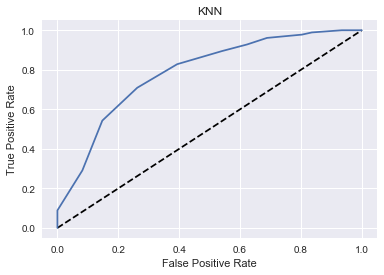

In [230]:
y_pred_prob= knn.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN")
plt.show()

In [231]:
a_c1=roc_auc_score(y_test, knn.predict(X_test))
a_c1

0.5163934426229508

<b>Decision Tree Classifier</b>

In [234]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth=50)

max_auc_roc_sc(dtc,X,y)

Maximum AUC_ROC Score corresponding to: 92  and it is : 0.678


In [238]:
pred_dtc= dtc.predict(X_test)
dtc1= dtc.score(X_test, y_test)
print("The accuracy of the Decision Tree Model is:",round((dtc1),3))
print(confusion_matrix(y_test,pred_dtc))

The accuracy of the Decision Tree Model is: 0.919
[[346  15]
 [ 19  42]]


<b>Observations:</b>
<li> There are 346 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 42 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 15 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 19 observation which are predicted Positive as FP(False Positive) and it is False.</li>

In [239]:
print(classification_report(y_test,pred_dtc))

             precision    recall  f1-score   support

          0       0.95      0.96      0.95       361
          1       0.74      0.69      0.71        61

avg / total       0.92      0.92      0.92       422



In [240]:
from sklearn.model_selection import cross_val_score
mean_dtc_auc=cross_val_score(dtc, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score Score after cross validation", cross_val_score(dtc, X,y,cv=5,scoring="roc_auc").mean())
s_dtc_auc= cross_val_score(dtc, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Decision Tree Classifier from mean AUC_ROC score is",cross_val_score(dtc, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score Score after cross validation 0.6236002493699597
standard deviation for Decision Tree Classifier from mean AUC_ROC score is 0.008434306212970734


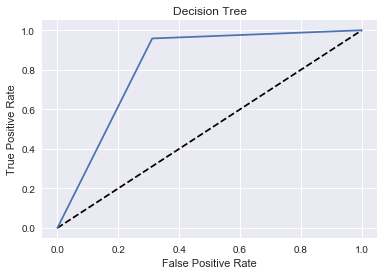

In [241]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= dtc.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree")
plt.show()

In [242]:
a_c2=roc_auc_score(y_test, dtc.predict(X_test))
a_c2

0.823486671813269

<b>Gradient Boosting Classifier</b>

In [243]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
parameters= {'learning_rate': [0.01,0.03,0.05], 'subsample': [0.1, 0.5,0.3], 'n_estimators': [10,50,100], 'max_depth': [2,4,8]}
gb= GridSearchCV(estimator=gb, param_grid= parameters, cv=5, n_jobs=-1)
gb.fit(X,y)
gb.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.3}

In [244]:
gb = GradientBoostingClassifier(learning_rate=0.05,max_depth=2,n_estimators=100,subsample=0.3)
max_auc_roc_sc(gb,X,y)

Maximum AUC_ROC Score corresponding to: 47  and it is : 0.65


In [246]:
pred_gb= gb.predict(X_test)
gb1= gb.score(X_test, y_test)
print("The accuracy of the Grading Boosting Model is:",round((gb1),3))

The accuracy of the Grading Boosting Model is: 0.9


In [247]:
print(confusion_matrix(y_test,pred_gb))

[[357   4]
 [ 38  23]]


<b>Observations:</b>
<li> There are 357 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 23 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 4 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 38 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [248]:
print(classification_report(y_test,pred_gb))

             precision    recall  f1-score   support

          0       0.90      0.99      0.94       361
          1       0.85      0.38      0.52        61

avg / total       0.90      0.90      0.88       422



In [249]:
from sklearn.model_selection import cross_val_score
mean_gb_auc=cross_val_score(gb, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(gb, X,y,cv=5,scoring="roc_auc").mean())
std_gb_auc= cross_val_score(gb, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Gradient  Boosting from mean AUC_ROC score is",cross_val_score(gb, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.8104588550436098
standard deviation for Gradient  Boosting from mean AUC_ROC score is 0.03139924891232703


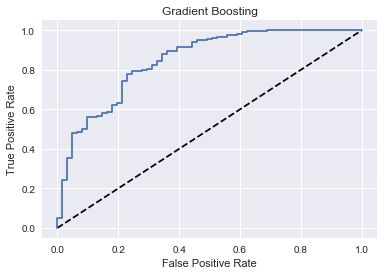

In [250]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= gb.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting")
plt.show()

In [251]:
a_c3=roc_auc_score(y_test, gb.predict(X_test))
a_c3

0.6829844239589482

<b>Random Forest Classifier</b>

In [252]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
parameters= {'n_estimators':[4,6,8],'max_features':['log2','sqrt','auto'],'criterion':['entropy','gini'],'max_depth':[2,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[3,5,7]}
rfc= GridSearchCV(rfc,parameters)
rfc.fit(X,y)
rfc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 6}

In [253]:
rfc=RandomForestClassifier(criterion='gini', max_depth=10,max_features='sqrt',min_samples_leaf=3,min_samples_split=2,n_estimators=6)
max_auc_roc_sc(rfc,X,y)

Maximum AUC_ROC Score corresponding to: 48  and it is : 0.622


In [255]:
pred_rfc= rfc.predict(X_test)
rf= rfc.score(X_test, y_test)
print("The accuracy of the Random Forest Classifier is:",round((rf),3))

The accuracy of the Random Forest Classifier is: 0.898


In [256]:
print(confusion_matrix(y_test,pred_rfc))

[[356   5]
 [ 38  23]]


<b>Observations:</b>
<li> There are 356 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 23 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 5 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 38 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [257]:
print(classification_report(y_test,pred_rfc))

             precision    recall  f1-score   support

          0       0.90      0.99      0.94       361
          1       0.82      0.38      0.52        61

avg / total       0.89      0.90      0.88       422



In [258]:
from sklearn.model_selection import cross_val_score
mean_rfc_auc=cross_val_score(rfc, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(rfc, X,y,cv=5,scoring="roc_auc").mean())
std_rfc_auc= cross_val_score(rfc, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Random Forest Classifier from mean AUC_ROC score is",cross_val_score(rfc, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.7129059345792536
standard deviation for Random Forest Classifier from mean AUC_ROC score is 0.030049693249456097


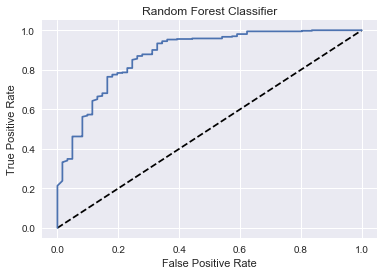

In [259]:
y_pred_prob= rfc.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier")
plt.show()

In [262]:
a_c4=roc_auc_score(y_test, rfc.predict(X_test))
a_c4

0.6815993824077017

# Evaluation:

In [263]:
#Lets initialise the data frame with columns model and f1_score
data= [["KNN", m1, mean_knn_auc,st_knn_auc],["Decision Tree Classifier",dtc1,mean_dtc_auc,s_dtc_auc],["Gradient Boosting Classifier", gb1,mean_gb_auc, std_gb_auc],["Random Forest Classifier",rf,mean_rfc_auc,std_rfc_auc]]
comparsion_table= pd.DataFrame(data, columns=["Model Name", "Accuracy","Mean F1 Score"," Std from mean F1 Score"], index=[1,2,3,4])
comparsion_table

,Model Name,Accuracy,Mean F1 Score,Std from mean F1 Score
1,KNN,0.860190,0.757992,0.037500
2,Decision Tree Classifier,0.919431,0.626187,0.008573
3,Gradient Boosting Classifier,0.900474,0.816733,0.028908
4,Random Forest Classifier,0.898104,0.724542,0.037240


<b>Observations:</b>
<li> From the above models, Decision Tree Classifier performed well with 91.94% accuracy.</li>
<li>As the data was imbalanced, we used AUC ROC for model evaluation and calculated Mean F1 Score and Standard Deviation mean F1 Score</li>

<b>Saving the Prediction</b>

As the Gradient Boosting Classifier performed well, we are saving the prediction.

In [265]:
np.savetxt('Model9.csv',pred_gb,delimiter=',')

In [267]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(gb, 'Project9.pkl')

['Project9.pkl']